In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
can = datasets.load_breast_cancer()

In [5]:
df = pd.DataFrame(data=can.data,columns=can.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['label'] = can.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X = df.drop(columns=['label'])
y = can.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train,y_train)

C:\Users\yasudatoshiki\Anaconda3\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,pred)

0.956140350877193

## 次元削減

### まずはデータを一部可視化してみる

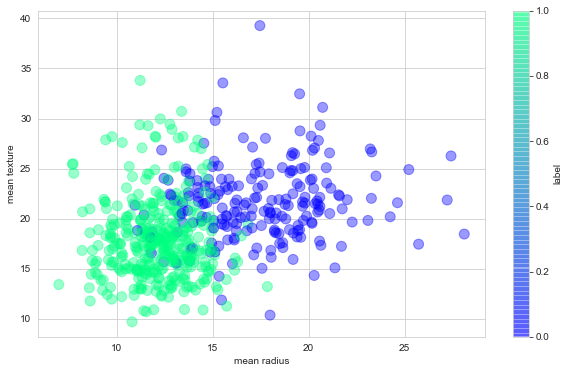

In [18]:
fig,ax = plt.subplots(figsize=(10,6))
df.plot(kind = 'scatter',x='mean radius',y='mean texture',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)

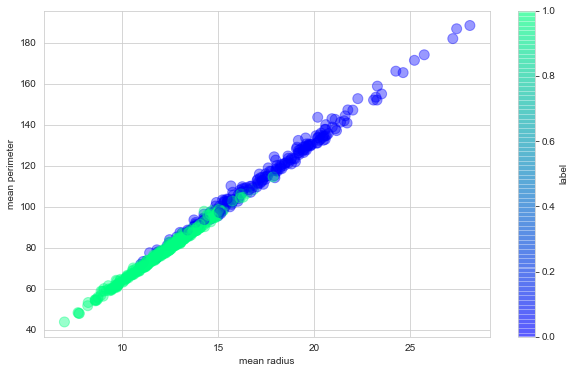

In [19]:
fig,ax = plt.subplots(figsize=(10,6))
df.plot(kind = 'scatter',x='mean radius',y='mean perimeter',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)

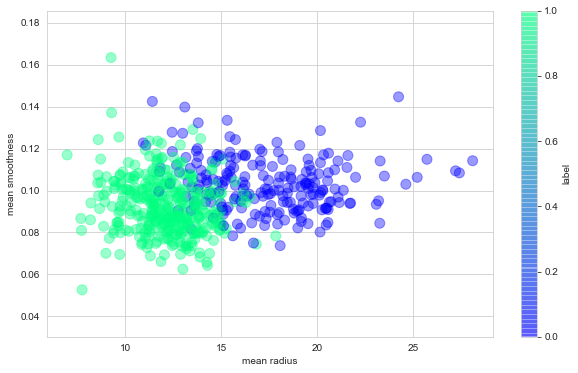

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
df.plot(kind = 'scatter',x='mean radius',y='mean smoothness',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)

#### ある程度線形の関係があることが分かるが、綺麗には分かれなさそう

### データ間の相関関係を見てみる

In [30]:
df.loc[:,'mean radius':'worst fractal dimension'].corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 一部を可視化してみる

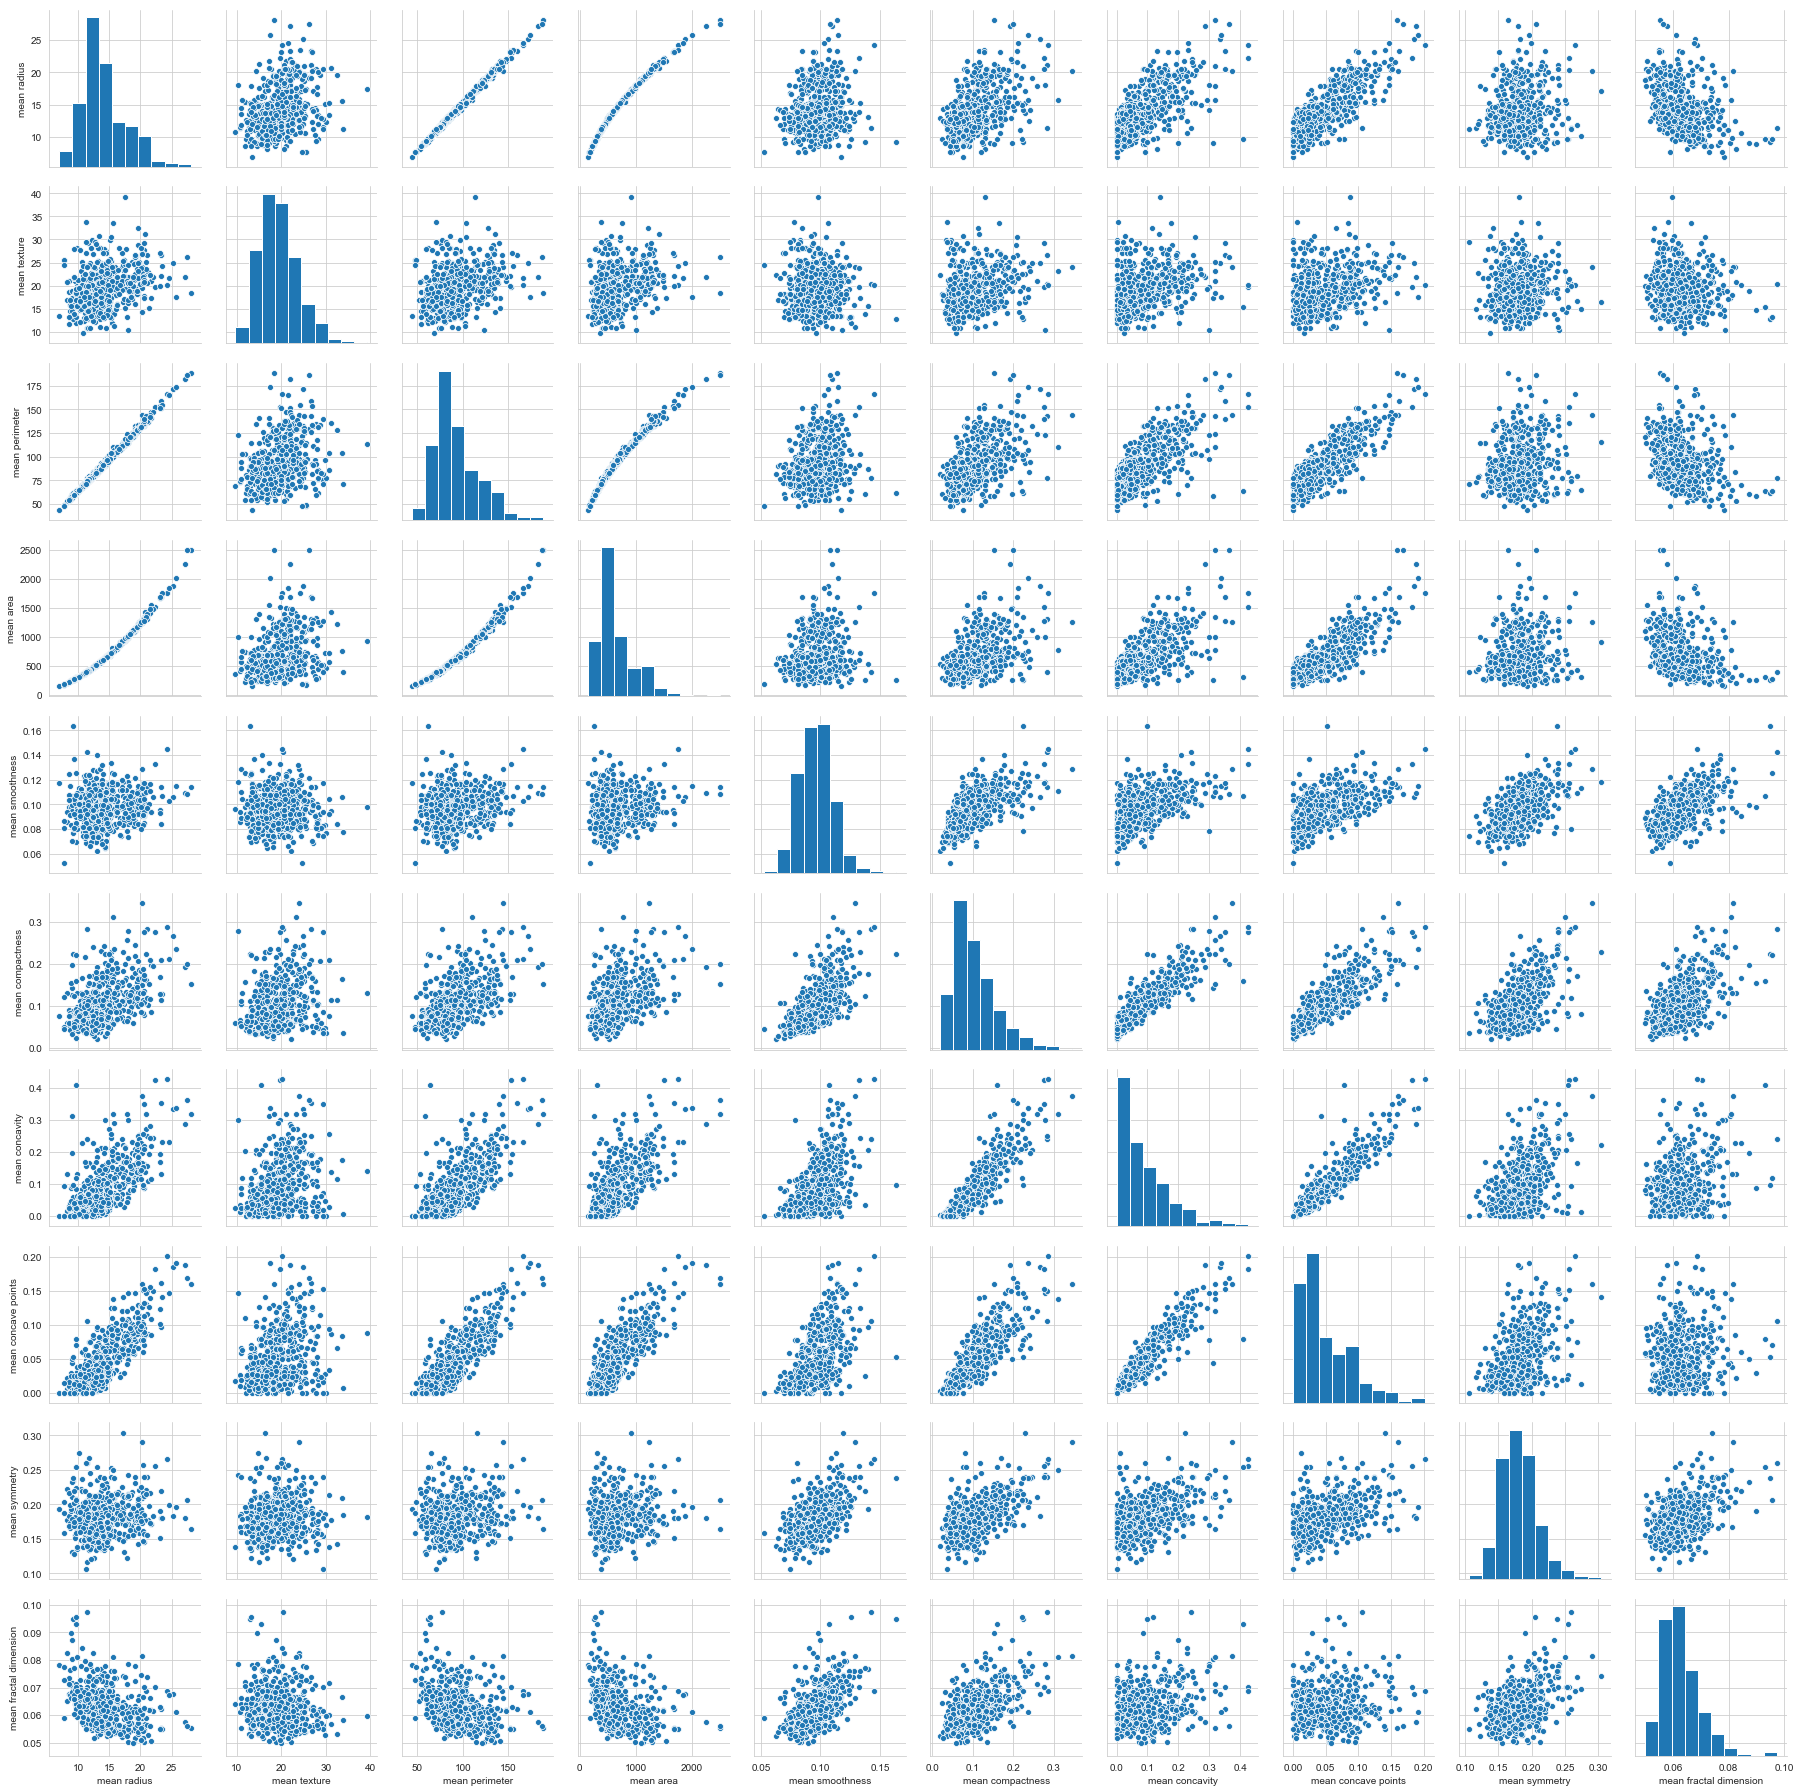

In [28]:
sns.pairplot(df.loc[:,'mean radius':'mean fractal dimension'])

#### データにある程度の相関関係があることが見て取れるので、次元削減を実行して有効なデータを抽出しつつ次元を圧縮する

### 主成分分析

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()

In [33]:
X_pca = pca.fit_transform(df.loc[:,'mean radius':'worst fractal dimension'])

In [34]:
X_pca

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

In [35]:
df_pca = pd.DataFrame(X_pca,columns=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',
                                    '11th','12th','13th','14th','15th','16th','17th','18th','19th','20th',
                                    '21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th',])


In [36]:
df_pca.head()

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,...,21st,22nd,23rd,24th,25th,26th,27th,28th,29th,30th
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,...,0.021189,0.000241,0.002528,0.011560,0.005773,0.001377,-0.001982,0.001293,0.001989,0.000704
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,...,0.005237,0.021069,0.001565,0.006968,-0.006978,0.001411,-0.000083,-0.001347,0.000686,-0.001061
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,...,-0.009865,-0.002394,-0.004125,-0.004007,0.000709,-0.003781,0.000178,0.000018,-0.000775,0.000405
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,...,0.011169,0.007063,0.001537,0.007003,-0.010261,-0.002899,0.000016,0.001369,-0.002139,-0.001657
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,...,-0.009916,0.010269,0.002204,0.002764,0.002455,0.001665,0.003290,0.000273,0.001783,0.000327


### 各主成分の解釈 

In [37]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

### 累積寄与率

In [38]:
pca.explained_variance_ratio_.cumsum()

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

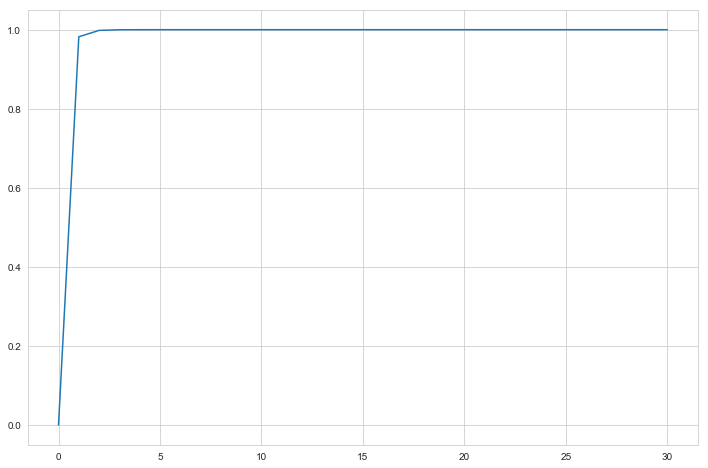

In [40]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack([0,pca.explained_variance_ratio_.cumsum()]))
plt.show()

### 元の特徴量と次元削減後の各主成分の相関関係

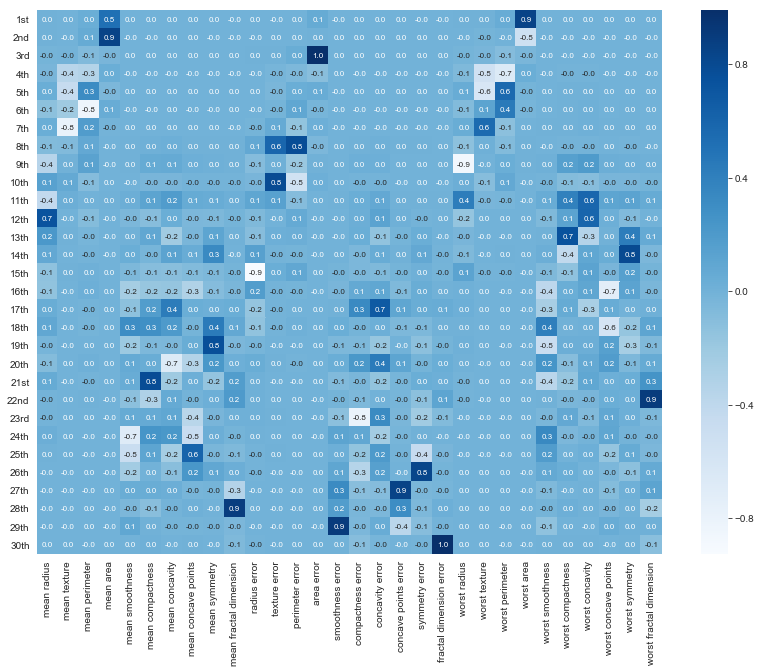

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(pca.components_,
           cmap='Blues',
           annot=True,
           annot_kws={'size':8},
           fmt='1.1f',
           xticklabels= df.loc[:,'mean radius':'worst fractal dimension'].columns,
           yticklabels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th',
                                    '11th','12th','13th','14th','15th','16th','17th','18th','19th','20th',
                                    '21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th'])


In [1]:
df_pca['label'] = can.target

NameError: name 'can' is not defined

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
df_pca.plot(kind = 'scatter',x='1st',y='2nd',s=100,c='label',cmap='winter',alpha=0.5,ax = ax)

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
df.plot(kind = 'scatter',x='mean radius',y='mean texture',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)
df.plot(kind = 'scatter',x='mean radius',y='mean perimeter',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)
df.plot(kind = 'scatter',x='mean radius',y='mean area',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)
df.plot(kind = 'scatter',x='mean radius',y='mean smoothness',s=100,c='label',cmap='winter',alpha=0.4,ax=ax)